Purpose: Load + preprocess + feature engineering + save processed data.

Data shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

       

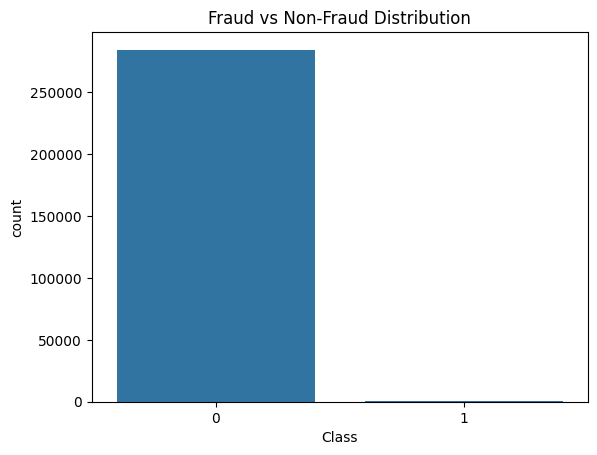

Before SMOTE: [284315    492]
After SMOTE: [284315 284315]
✅ Saved processed data to '../data/processed_data.npz'


In [2]:
# %%
# 01-data-explore.ipynb — EDA + preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib
import os

# Load dataset
DATA_PATH = "../data/creditcard.csv"
df = pd.read_csv(DATA_PATH)
print("Data shape:", df.shape)
print(df.head())

# Basic EDA
print(df['Class'].value_counts())  # If dataset has 'Class' column
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

# Rename target for consistency
df.rename(columns={'Class': 'is_fraud'}, inplace=True)

# Add derived features
df['amount_log'] = np.log1p(df['Amount'])
df['hour'] = (df['Time'] // 3600) % 24
features = ['amount_log', 'hour', 'Amount']
target = 'is_fraud'

# Split features and target
X = df[features]
y = df[target]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, '../models/scaler.joblib')

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)
print("Before SMOTE:", np.bincount(y))
print("After SMOTE:", np.bincount(y_res))

# Save processed data for next notebook
np.savez_compressed('../data/processed_data.npz', X_res=X_res, y_res=y_res)
print("✅ Saved processed data to '../data/processed_data.npz'")


In [3]:
# Save processed data for next notebook
np.savez_compressed('../data/processed_data.npz', X_res=X_res, y_res=y_res)